The purpose of this Code is to implement the Gray-Scott Model of Reaction-Diffusion. 

In [29]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from scipy.linalg import solve
import sympy
sympy.init_printing()

In [30]:
U, V, DT, D, FF, K, D_V, D_U , DX2, DY2, DU, DV, D2= sympy.symbols('u v dt d F k D_v D_u dx^^2 dy^^2 du dv d^^2')

first step is to discretize the below differential equations. In this form the Laplacian has been replaced by the 2D X and Y

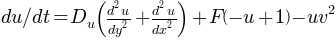

In [31]:
Equation_U = sympy.Eq(DU/DT , D_U*((D2*U/DX2)+(D2*U/DY2)) - U*V**2 + FF*(1-U))
Equation_U

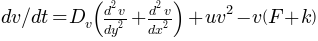

In [32]:
Equation_V = sympy.Eq(DV/DT , D_V*((D2*V/DX2)+(D2*V/DY2)) + U*V**2 -(V*(FF+K)))
Equation_V

actually, the first term in both equations, with the Dv looks like the same as the 2D Diffusion term. So only the other two terms on the RHS need to be accounted for

assuming correct implementation, the above codes are the meat of the Foward Time central difference method function

This code attempts to recreate the FTCS code from module 2, but, instead it recieves two input arrays, u and v, and spits out two arrays

In [33]:
def FTCS(u, v, nt, Du, Dv, dt, dx, dy, F, k):
    
    j_mid_u = int((numpy.shape(u)[0])/2)    #this allows us to track the center of the U array
    i_mid_u = int((numpy.shape(u)[1])/2)
    
    j_mid_v = int((numpy.shape(v)[0])/2)    #this allows us to track the center of the V array
    i_mid_v = int((numpy.shape(v)[1])/2)
    
    for n in range(nt):
        delta=dx*dy
        un=u.copy()   #Discretization of U
        vn=v.copy() 
        u[1:-1, 1:-1] = un[1:-1, 1:-1] + (Du*dt/delta**2)*(un[2:,1:-1] - 2*un[1:-1, 1:-1] + un[:-2,1:-1]+\
                                                           un[1:-1,2:] - 2*un[1:-1, 1:-1] + un[1:-1,:-2])-\
                                                           dt*(un[1:-1, 1:-1]*vn[1:-1, 1:-1]**2)+\
                                                           dt*F*(1-un[1:-1, 1:-1])
                                                                                                           
        #Discretization of V
        v[1:-1, 1:-1] = vn[1:-1, 1:-1] + (Dv*dt/delta**2)*(vn[2:,1:-1] - 2*vn[1:-1, 1:-1] + vn[:-2,1:-1]+\
                                                           vn[1:-1,2:] - 2*vn[1:-1, 1:-1] + vn[1:-1,:-2])+\
                                                           dt*(un[1:-1, 1:-1]*vn[1:-1, 1:-1]**2)-\
                                                           dt*vn[1:-1, 1:-1]*(F+k)
                                                           
        #Neumann Boundary Conditions
        u[-1,:]=u[-2,:]     #For u
        u[:,-1]=u[:,-2]     
        v[-1,:]=v[-2,:]     #For v
        v[:,-1]=v[:,-2]           
                                                           
    return u, v                                                   
                                                           

ok, lets test the code

In [34]:
#Parameters from the Problem Statement
X_Domain = 5  #in meters
Y_Domain = 5  #in meters

nx = 192
ny = 192

dx = X_Domain/(nx-1)
dy = Y_Domain/(ny-1)

delta = dx*dy

Du= 0.00016
Dv=0.00008
F=0.035
k=0.065  #Number of Bacteria?


T=8000 #seconds
dt = (9/40)*delta**2/max(Du,Dv)  #Stability Criteria?
nt = int(T/dt)

x= numpy.linspace(0,X_Domain, nx)  #for plotting purposes
y= numpy.linspace(0,Y_Domain, ny)  #for plotting purposes

ui = numpy.ones((ny, nx))*1  #Just a test
vi = numpy.ones((ny, nx))*1  #just a test


In [35]:
print(nt)

12113814


In [36]:
u, v = FTCS(ui.copy(), vi.copy(), 8000, Du, Dv, dt, dx, dy, F, k)

In [37]:
print(u)

[[ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          0.99125878  0.98401611 ...,  0.92356844  0.92356844
   0.92356844]
 [ 1.          0.98401611  0.97013932 ...,  0.85044695  0.85044695
   0.85044695]
 ..., 
 [ 1.          0.92356844  0.85044695 ...,  0.01801733  0.01801734
   0.01801734]
 [ 1.          0.92356844  0.85044695 ...,  0.01801734  0.01801735
   0.01801735]
 [ 1.          0.92356844  0.85044695 ...,  0.01801734  0.01801735
   0.01801735]]


In [38]:
mx, my = numpy.meshgrid(x,y)

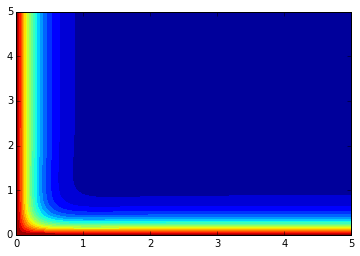

In [39]:
pyplot.contourf(mx, my, u, 20)